In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd

In [4]:
import celloracle as co

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [5]:
base_GRN = co.data.load_mouse_scATAC_atlas_base_GRN()
base_GRN

,peak_id,gene_short_name,9430076c15rik,Ac002126.6,Ac012531.1,Ac226150.2,Afp,Ahr,Ahrr,Aire,...,Znf784,Znf8,Znf816,Znf85,Zscan10,Zscan16,Zscan22,Zscan26,Zscan31,Zscan4
0,chr10_100050979_100052296,4930430F08Rik,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chr10_101006922_101007748,SNORA17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,chr10_101144061_101145000,Mgat4c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,chr10_10148873_10149183,9130014G24Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chr10_10149425_10149815,9130014G24Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91971,chrX_99839037_99840900,Phka1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
91972,chrY_345823_347369,Eif2s3y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91973,chrY_581272_582790,Uty,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91974,chrY_621772_623366,Ddx3y,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
import anndata
adata = anndata.read_h5ad('../data/slideseq/day3_1.h5ad')
adata

AnnData object with n_obs × n_vars = 15920 × 24649
    obs: 'cluster', 'rctd_cluster'
    uns: 'cluster_colors', 'rctd_cluster_colors'
    obsm: 'X_spatial', 'rctd_results', 'spatial'

In [7]:
n_top_genes = 3000
min_cells = 10
min_counts = 300

adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)
sc.pp.filter_cells(adata, min_counts=min_counts)
adata = adata[adata.obs["pct_counts_mt"] < 20].copy()
adata = adata[:, ~adata.var["mt"]]
sc.pp.filter_genes(adata, min_cells=min_cells)

adata.layers["raw_count"] = adata.X

sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(
    adata, flavor="seurat", n_top_genes=n_top_genes)

adata = adata[:, adata.var.highly_variable]
adata

View of AnnData object with n_obs × n_vars = 10277 × 3000
    obs: 'cluster', 'rctd_cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cluster_colors', 'rctd_cluster_colors', 'log1p', 'hvg'
    obsm: 'X_spatial', 'rctd_results', 'spatial'
    layers: 'raw_count'

In [8]:
%%time

sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_diffmap')

CPU times: user 16.2 s, sys: 2.94 s, total: 19.1 s
Wall time: 16 s


In [9]:
sc.tl.paga(adata, groups='rctd_cluster')

In [10]:
plt.rcParams["figure.figsize"] = [6, 6]
sc.pl.paga(adata)

In [11]:
sc.tl.draw_graph(adata, init_pos='paga', random_state=123)

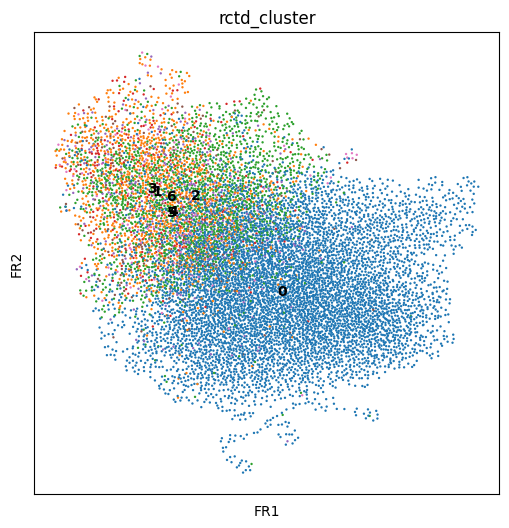

In [14]:
%matplotlib inline
sc.pl.draw_graph(adata, color='rctd_cluster', legend_loc='on data')

In [15]:
oracle = co.Oracle()

In [18]:
adata.X = adata.layers["raw_count"].copy()

oracle.import_anndata_as_raw_count(
    adata=adata,
    cluster_column_name="rctd_cluster",
    embedding_name="X_draw_graph_fr"
)

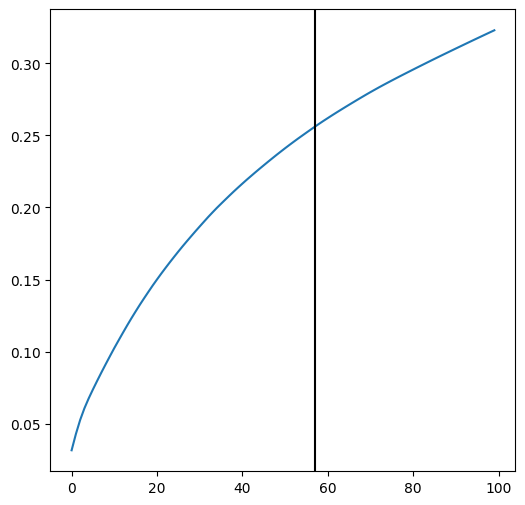

57


In [19]:
%matplotlib inline

# Perform PCA
oracle.perform_PCA()

# Select important PCs
plt.plot(np.cumsum(oracle.pca.explained_variance_ratio_)[:100])
n_comps = np.where(np.diff(np.diff(np.cumsum(oracle.pca.explained_variance_ratio_))>0.002))[0][0]
plt.axvline(n_comps, c="k")
plt.show()
print(n_comps)
n_comps = min(n_comps, 50)

In [20]:
n_cell = oracle.adata.shape[0]
print(f"cell number is :{n_cell}")

cell number is :10277


In [21]:
k = int(0.025*n_cell)
print(f"Auto-selected k is :{k}")

Auto-selected k is :256


In [22]:
oracle.knn_imputation(
    n_pca_dims=n_comps, 
    k=k, 
    balanced=True, 
    b_sight=k*8,
    b_maxl=k*4, 
    n_jobs=4
)

In [26]:
base_GRN = co.data.load_mouse_scATAC_atlas_base_GRN()
oracle.import_TF_data(TF_info_matrix=base_GRN)

In [28]:
%%time

links = oracle.get_links(
    cluster_name_for_GRN_unit="rctd_cluster", 
    alpha=10,
    verbose_level=10
)

  0%|          | 0/7 [00:00<?, ?it/s]

Inferring GRN for 0...


  0%|          | 0/2381 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [04:57<29:43, 297.17s/it]

Inferring GRN for 1...


  0%|          | 0/2381 [00:00<?, ?it/s]

 29%|██▊       | 2/7 [06:37<15:05, 181.11s/it]

Inferring GRN for 2...


  0%|          | 0/2381 [00:00<?, ?it/s]

 43%|████▎     | 3/7 [08:20<09:42, 145.75s/it]

Inferring GRN for 3...


  0%|          | 0/2381 [00:00<?, ?it/s]

 57%|█████▋    | 4/7 [09:54<06:15, 125.25s/it]

Inferring GRN for 4...


  0%|          | 0/2381 [00:00<?, ?it/s]

 71%|███████▏  | 5/7 [11:25<03:45, 112.81s/it]

Inferring GRN for 5...


  0%|          | 0/2381 [00:00<?, ?it/s]

 86%|████████▌ | 6/7 [12:57<01:45, 105.93s/it]

Inferring GRN for 6...


  0%|          | 0/2381 [00:00<?, ?it/s]

100%|██████████| 7/7 [14:29<00:00, 124.20s/it]

CPU times: user 9min, sys: 15.9 s, total: 9min 16s
Wall time: 14min 29s


In [64]:
with open('../data/slideseq/celloracle_links.pkl', 'rb') as f:
    links_dict = pickle.load(f)

In [65]:
links_dict

{'B-cell':          source         target  coef_mean  coef_abs             p      -logp
 0        Nfatc4  0610030E20Rik  -0.000207  0.000207  1.500551e-08   7.823749
 1          Pax5  0610030E20Rik   0.000400  0.000400  4.740620e-02   1.324165
 2          Ebf1  0610030E20Rik   0.000875  0.000875  1.625185e-09   8.789097
 3          Atf3  0610030E20Rik  -0.000473  0.000473  2.122179e-12  11.673218
 4           Mga  0610030E20Rik   0.000392  0.000392  3.169740e-10   9.498976
 ...         ...            ...        ...       ...           ...        ...
 111160     Klf4         Zwilch   0.000019  0.000019  1.872425e-01   0.727596
 111161  Zscan22         Zwilch  -0.000056  0.000056  1.562141e-04   3.806280
 111162      Id1         Zwilch   0.000039  0.000039  5.493913e-03   2.260118
 111163      Id2         Zwilch   0.000318  0.000318  9.703121e-06   5.013089
 111164    Mef2c         Zwilch  -0.000370  0.000370  2.020351e-07   6.694573
 
 [111165 rows x 6 columns],
 'Cd8 T-cell':          

In [57]:
links.cluster

[0, 1, 2, 3, 4, 5, 6]

In [32]:
df1 = links.links_dict[1].query('source=="Pax5"')
df2 = links.links_dict[2].query('source=="Pax5"')

In [46]:
celltypes = {
    "0": "B-cell",
    "1": "Cd8 T-cell",
    "2": "Tfh",
    "3": "Naive",
    "4": "Tfh",
    "5": "Treg",
    "6": "Th1"
}

In [47]:
# Create a new dictionary with replaced keys
new_links_dict = {}

for key, value in links.links_dict.items():
    if str(key) in celltypes:
        new_key = celltypes[str(key)]
        new_links_dict[new_key] = value
    else:
        new_links_dict[key] = value

# Replace the original links_dict with the new one
links.links_dict = new_links_dict

# Print the new keys to verify the change
print("New keys:", list(links.links_dict.keys()))


New keys: ['B-cell', 'Cd8 T-cell', 'Tfh', 'Naive', 'Treg', 'Th1']


In [60]:
links.links_dict['B-cell']

,source,target,coef_mean,coef_abs,p,-logp
0,Nfatc4,0610030E20Rik,-0.000207,0.000207,1.500551e-08,7.823749
1,Pax5,0610030E20Rik,0.000400,0.000400,4.740620e-02,1.324165
2,Ebf1,0610030E20Rik,0.000875,0.000875,1.625185e-09,8.789097
3,Atf3,0610030E20Rik,-0.000473,0.000473,2.122179e-12,11.673218
4,Mga,0610030E20Rik,0.000392,0.000392,3.169740e-10,9.498976
...,...,...,...,...,...,...
111160,Klf4,Zwilch,0.000019,0.000019,1.872425e-01,0.727596
111161,Zscan22,Zwilch,-0.000056,0.000056,1.562141e-04,3.806280
111162,Id1,Zwilch,0.000039,0.000039,5.493913e-03,2.260118
111163,Id2,Zwilch,0.000318,0.000318,9.703121e-06,5.013089


In [51]:
import pickle

with open('celloracle_links.pkl', 'wb') as f:
    pickle.dump(links.links_dict, f)

dict_keys(['B-cell', 'Cd8 T-cell', 'Tfh', 'Naive', 'Treg', 'Th1'])

In [54]:
# Load the saved links dictionary
with open('celloracle_links.pkl', 'rb') as f:
    loaded_links_dict = pickle.load(f)

# Print the keys to verify the loaded data
print("Loaded keys:", list(loaded_links_dict.keys()))

# Verify that the loaded dictionary matches the original
assert loaded_links_dict.keys() == links.links_dict.keys(), "Loaded dictionary does not match the original"

print("Loaded dictionary matches the original.")

Loaded keys: ['B-cell', 'Cd8 T-cell', 'Tfh', 'Naive', 'Treg', 'Th1']
Loaded dictionary matches the original.


In [55]:
loaded_links_dict['Cd8 T-cell'][loaded_links_dict['Cd8 T-cell'].p < 0.05].query('target=="Cd74"')

,source,target,coef_mean,coef_abs,p,-logp
17733,Pax5,Cd74,0.106088,0.106088,7.126565e-12,11.147120
17734,Ebf1,Cd74,0.072919,0.072919,2.955392e-09,8.529385
17736,Bcl11a,Cd74,0.118188,0.118188,9.356197e-11,10.028901
17737,Egr2,Cd74,-0.022935,0.022935,2.450965e-10,9.610663
17738,Stat2,Cd74,0.004222,0.004222,7.149980e-04,3.145695
17739,Klf7,Cd74,-0.011001,0.011001,4.019156e-08,7.395865
17740,Hivep1,Cd74,-0.005752,0.005752,2.297372e-05,4.638769
17741,Rxra,Cd74,-0.005016,0.005016,7.425490e-09,8.129275
17742,Taf1,Cd74,-0.006647,0.006647,2.678102e-09,8.572173
17743,Myc,Cd74,0.014421,0.014421,1.125579e-12,11.948624


In [34]:
pd.DataFrame(
    [df2.set_index('target').loc[np.intersect1d(
        df1.target, df2.target)].coef_mean-df1.set_index('target').loc[
     np.intersect1d(df1.target, df2.target)].coef_mean]).T.sort_values(by='coef_mean', ascending=False)[:20]

,coef_mean
target,
Ccl5,0.031504
Rps24,0.027042
Lgals1,0.024633
Cd74,0.023614
Iglc3,0.018855
Smc4,0.015679
Epsti1,0.015348
Lyz2,0.014656
Clu,0.011830
